## Name: sarat chowdary
## Roll No: S20200010107
## End Lab Exam - ML

### Comments at start of each block 

In [1]:
# importing the basic required libraries
import random
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# creating a dataset of size 300 for angle values from 60 to 360
x = np.random.randint(60,360,size=300)
X_1 = []   
for i in range(len(x)):
    X_1.append(math.radians(x[i]))   

In [3]:
# This is to add the K value in the equation - from normal distribution with mean 0.5&std dev 0.15
K = np.random.normal(0.5,0.15,len(X_1))  
output = []
for i in range(len(X_1)):
    output.append(math.sin(X_1[i])+math.cos(X_1[i]) + K[i]**2)

In [4]:
# Concatenating both the lists and shuffling the data
DataSet = []

for i in range(len(x)):
    DataSet.append([X_1[i],output[i]])  

DataSet = np.array(DataSet)
np.random.shuffle(DataSet)

In [5]:
# splitting into train and test

DataSet = DataSet[:int(len(DataSet)*0.8)]
testset = DataSet[int(len(DataSet)*0.8):]
print(len(DataSet), len(testset))

240 48


In [6]:
# for plotting the predictions vs dataset
def plot_n(DataSet,w,k):
    plt.figure(facecolor='grey')
    ax = plt.axes()
    ax.set_facecolor('white')
    for i in range(len(DataSet)):
            plt.plot(DataSet[i,0], DataSet[i,1], 'g.')

    
    for i in range(100,500):
        data = w[0]
        for j in range(1,k+1):
            data += (w[j] * (i/100)**j)
        plt.plot(i/100, data, 'r+')
    plt.show()

In [7]:
# Gradient descent for linear regression
def grad_des(x, y, alpha, epochs):
    
    m = np.shape(x)[0] # samples
    n = np.shape(x)[1] # features
    
    x = np.concatenate((np.ones((m,1)),x), axis=1)
    w = 2*np.random.rand(n+1,)-1
    loss_history = []
    
    for current_iteration in range(epochs):
        y_estimated = w.dot(x.T)
        error = y_estimated - y
        cost = np.sum(error ** 2)
        gradient = (1 / m) * x.T.dot(error)
        w = w - alpha * gradient
        loss_history.append(cost)
    return loss_history, w

In [8]:
# calling the function and retriving the sse loss and coefficients w
# also plotting the loss function with respect to time
loss, w = grad_des(DataSet[:,:-1],DataSet[:,-1], 0.01, 100)


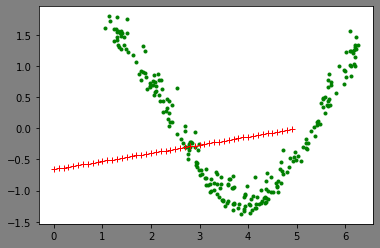

In [9]:
# plotting the predictions vs the dataset
plt.figure(facecolor='grey')
ax = plt.axes()
ax.set_facecolor('white')
for i in range(len(DataSet)):
        plt.plot(DataSet[i,0], DataSet[i,1], 'g.')
for i in range(50):
        plt.plot(i/10, w[1] * i/10 + w[0], 'r+')
plt.show()

In [10]:
# defining the gradient descent function for non linear models instead of just linear regression
def grad_des_n(x, y, alpha, epochs,k):
    
    temp = x
    x = np.concatenate((np.power(x,0),x), axis=1)
    for i in range(1,k):
        x = np.concatenate((x,np.power(temp,i+1)), axis=1)
            
    m = np.shape(x)[0] # samples
    n = np.shape(x)[1] # features
    
    w = 2*np.random.rand(n,)-1
    loss_history = []
    
    for current_iteration in range(epochs):
        y_estimated = w.dot(x.T)
        error = y_estimated - y
        cost = np.sum(error ** 2)
        gradient = (1 / m) * x.T.dot(error)
        w = w - alpha * gradient/(np.linalg.norm(gradient))
        loss_history.append(cost)
    return loss_history, w

For model 1
198.80745190889286 [ 0.45982311 -0.12890019]


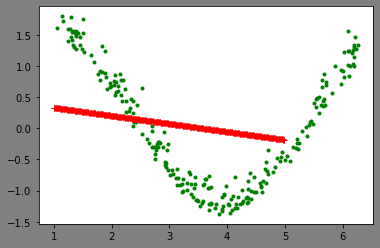

For model 2
348.45997999225006 [-0.39581835 -0.28608912  0.03342687  0.01069591]


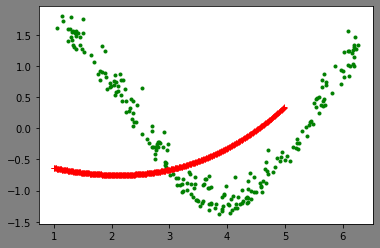

For model 3
4.45581279136276e+17 [ 0.03034568 -0.26691847 -0.64290381 -0.0851894   0.64340422  0.99634434
  0.13258859  0.86950495  0.24958093  0.2436529  -0.69967832  0.39336068
  0.90539467 -0.16098968]


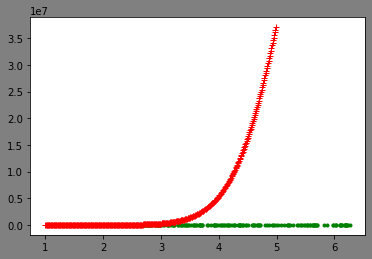

For model 4
7.427577278279421e+19 [-0.21216978  0.01652378 -0.20267859  0.18043776 -0.18370838 -0.86636341
 -0.20129141 -0.2338129  -0.85560231 -0.91929573 -0.14778641 -0.34936313
 -0.21202523  0.65060161  0.35214499 -0.08310136]


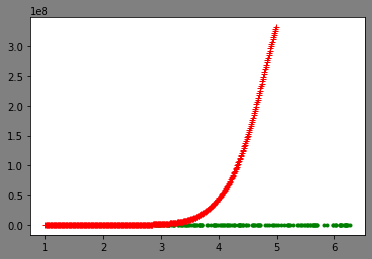

In [11]:
# calling the functions

loss, w = grad_des_n(DataSet[:,:-1],DataSet[:,-1], 0.01, 500,1)
print("For model 1")
print(loss[-1], w)
plot_n(DataSet,w,1)

loss, w = grad_des_n(DataSet[:,:-1],DataSet[:,-1], 0.01, 500,3)
print("For model 2")
print(loss[-1], w)
plot_n(DataSet,w,3)

loss, w = grad_des_n(DataSet[:,:-1],DataSet[:,-1], 0.01, 500,13)
print("For model 3")
print(loss[-1], w)
plot_n(DataSet,w,13)

loss, w = grad_des_n(DataSet[:,:-1],DataSet[:,-1], 0.01, 500,15)
print("For model 4")
print(loss[-1], w)
plot_n(DataSet,w,15)

198.80409611716 [ 0.45995605 -0.12884354]


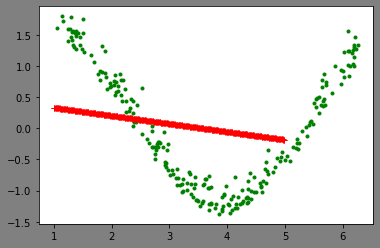

86737.25160332464 [ 0.44538541 -0.62108655  0.12118788 -0.729679    0.49106734 -0.057196  ]


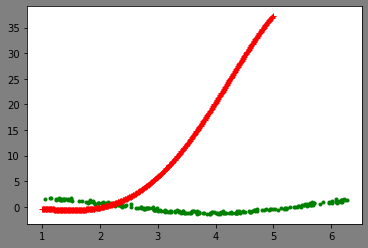

1.6698360746490454e+19 [ 0.68041203 -0.55863459  0.01188643  0.02946046  0.72526108 -0.26185183
  0.05309368  0.98568723  0.99045682 -0.55958631 -0.27193192  0.51411761
  0.17347544 -0.55640425 -0.07569638  0.03574267]


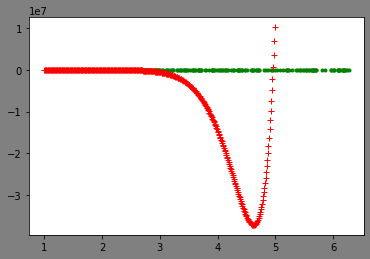

3.949983794386052e+24 [-0.16102139 -0.13787568  0.04765796  0.25063348  0.2769809  -0.99721211
  0.10531444  0.07707684 -0.91054475  0.09024242  0.46747668 -0.20004904
 -0.68267144 -0.28725584  0.97592071 -0.64468942  0.60127159 -0.97211577
  0.37116418 -0.04671944]


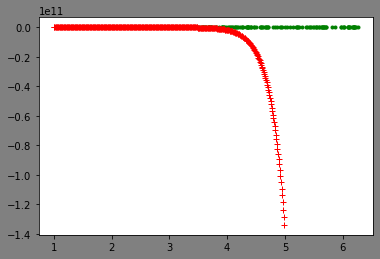

In [12]:
# calling the functions for question 4
loss, w = grad_des_n(DataSet[:,:-1],DataSet[:,-1], 0.01, 500,1)
print(loss[-1], w)
plot_n(DataSet,w,1)

loss, w = grad_des_n(DataSet[:,:-1],DataSet[:,-1], 0.01, 500,5)
print(loss[-1], w)
plot_n(DataSet,w,5)

loss, w_15 = grad_des_n(DataSet[:,:-1],DataSet[:,-1], 0.01, 500,15)
print(loss[-1], w_15)
plot_n(DataSet,w_15,15)

loss, w_19 = grad_des_n(DataSet[:,:-1],DataSet[:,-1], 0.01, 500,19)
print(loss[-1], w_19)
plot_n(DataSet,w_19,19)

In [13]:
# test set predictions
k = 15
x = DataSet[:,:-1]
temp = x
x = np.concatenate((np.power(x,0),x), axis=1)
x =x/np.mean(x)
for i in range(1,k):
        x = np.concatenate((x,np.power(temp,i+1)), axis=1)
print("predictions:")
print(w_15.dot(x.T))

predictions:
[-2.02148217e+06  4.44824603e+09 -1.01600587e+07 -4.64135044e+05
  1.62894386e+00  9.45147830e+09  5.55415885e+09 -2.90478369e+07
 -9.35076246e+05 -1.79284222e+02  3.36884524e+08 -2.89278371e+06
  1.52661469e+08 -1.53128003e+03  1.50078325e+09 -2.05247836e+07
  1.62894386e+00 -3.68456383e+07 -3.65125197e+07 -1.78676707e+06
 -9.08092360e+02 -8.82242081e+06  4.72621745e+08 -5.60963363e+00
 -8.78305372e+03 -1.67943454e+00 -4.52333748e+03 -1.30089164e+06
 -9.99951006e+05 -3.43067958e+00 -1.16444174e+07 -2.35603688e+07
 -7.11232663e+05  1.36037405e+08 -2.51239857e+07  8.08439223e+09
 -5.33069450e+06 -4.52333748e+03  7.66958539e+09 -2.93475224e+07
 -1.99859038e+07  5.55415885e+09  5.99298869e+08 -2.00336603e+04
 -2.89489562e-01 -4.08670388e+01  7.96719293e-01 -4.03270556e+03
 -6.90106432e+06  8.08406957e+08  1.70523358e+08 -1.78676707e+06
 -4.29755742e+06  2.28439481e+00 -2.88572469e+02 -6.76388857e+04
  1.07300880e+09 -2.98153559e+07 -5.36292775e+05  1.20581179e+08
 -2.59114448

In [14]:
def grad_des_n_l2(x, y, alpha, epochs,k, l):
    
    temp = x
    x = np.concatenate((np.power(x,0),x), axis=1)
    for i in range(1,k):
        x = np.concatenate((x,np.power(temp,i+1)), axis=1)

    m = np.shape(x)[0] # samples
    n = np.shape(x)[1] # features
    
    w = 2*np.random.rand(n,)-1
    loss_history = []
    
    for current_iteration in range(epochs):
        y_estimated = w.dot(x.T)
        error = y_estimated - y
        cost = np.sum(error ** 2)
        gradient = (1 / m) * x.T.dot(error)
        w = w - alpha * (gradient/(np.linalg.norm(gradient)) + l*w*w)
        loss_history.append(cost)
    return loss_history, w

For model 1
1.036208423960604e+27 [ 0.64924152  0.69848608  0.34806226  0.32786201  0.30239265  0.0389873
  0.02972287 -0.3150454   0.08526666 -0.27213948 -0.62207139  0.43030243
  0.72026936 -0.38104737  0.51076236  0.14603649  0.75872491 -0.90819661
 -0.09692897  0.039507  ]


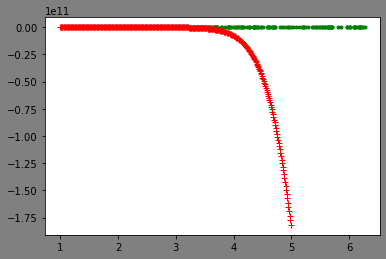

For model 2
9.397651195148543e+24 [ 0.38472071  0.78304501  0.16003608  0.87762405 -0.55363724 -0.9079713
  0.02458376  0.36665885 -0.04693504  0.94781611 -0.08978416  0.33996506
 -0.13828972  0.64247142  0.19465158  0.66904423 -0.30809152  0.2700508
  0.10912998 -0.01417555]


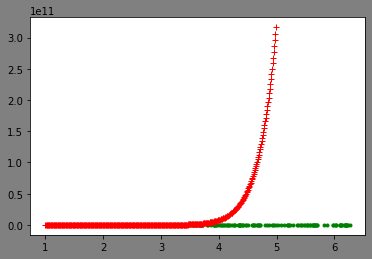

In [15]:
l = [1e-10,1e-5]


loss, w = grad_des_n_l2(DataSet[:,:-1],DataSet[:,-1], 0.01, 50,19,l[0])
print("For model 1")
print(loss[-1], w)
plot_n(DataSet,w,19)

loss, w = grad_des_n_l2(DataSet[:,:-1],DataSet[:,-1], 0.01, 50,19,l[1])
print("For model 2")
print(loss[-1], w)
plot_n(DataSet,w,19)

1.5190775286328377e+20 [ 0.38472071  0.78304501  0.16003608  0.87762405 -0.55363724 -0.9079713
  0.02458376  0.36665885 -0.04693504  0.94781611 -0.08978416  0.33996506
 -0.13828972  0.64247142  0.19465158  0.66904423 -0.30809152  0.2700508
  0.10912998 -0.01417555]


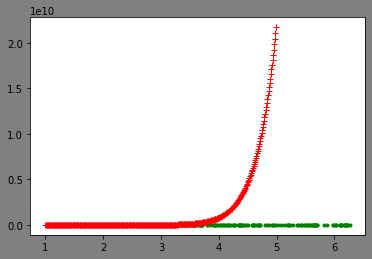

1.7902512658397446e+20 [ 0.38472071  0.78304501  0.16003608  0.87762405 -0.55363724 -0.9079713
  0.02458376  0.36665885 -0.04693504  0.94781611 -0.08978416  0.33996506
 -0.13828972  0.64247142  0.19465158  0.66904423 -0.30809152  0.2700508
  0.10912998 -0.01417555]


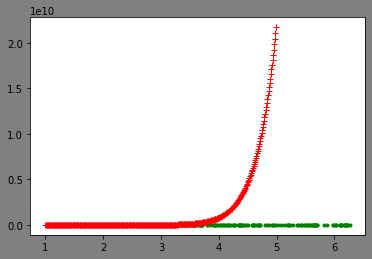

In [16]:
loss, w_15_1 = grad_des_n_l2(DataSet[:,:-1],DataSet[:,-1], 0.01, 100,15,l[0])
print(loss[-1], w)
plot_n(DataSet,w,15)

loss, w_15_2 = grad_des_n_l2(DataSet[:,:-1],DataSet[:,-1], 0.01, 100,15,l[1])
print(loss[-1], w)
plot_n(DataSet,w,15)

In [17]:
# test set predictions
k = 15
x = testset[:,:-1]
temp = x
x = np.concatenate((np.power(x,0),x), axis=1)
for i in range(1,k):
        x = np.concatenate((x,np.power(temp,i+1)), axis=1)
print("Test set predictions:")
print(w_15_1.dot(x.T))

Test set predictions:
[-4.55656003e+03 -4.62477396e+09 -2.09903355e+08 -6.09641011e+08
 -2.97865065e+09 -3.56855692e+00 -2.68401440e+09 -2.00072181e+08
 -1.64664713e+08 -1.34712924e+06 -8.05129927e+04 -2.42983597e+07
 -1.48097148e+07 -8.02331225e+07 -2.30420680e+06 -3.89957395e+05
 -1.23199484e+02 -1.25251999e+03 -1.60559279e+09 -1.35418766e+09
 -5.98082918e+05 -1.88802305e+09 -7.60430269e+07 -5.96174222e+04
 -2.09903355e+08 -3.57326688e+05 -3.84824285e+06 -1.67982645e+07
 -2.65654540e+08 -5.96174222e+04 -2.07320834e+04 -8.71953245e+08
 -5.04956012e+05 -8.06915532e+08 -2.15163993e+07 -2.15163993e+07
 -1.07362459e+07 -5.78812397e+07 -4.62607446e+07 -1.00555366e+07
 -4.62607446e+07 -7.20492454e+07 -2.57907510e+04 -4.77818616e+01
 -1.05301476e+09 -5.98082918e+05 -2.00957515e+09 -1.25251999e+03]


In [18]:
# test set predictions
k = 15
x = testset[:,:-1]
temp = x
x = np.concatenate((np.power(x,0),x), axis=1)
for i in range(1,k):
        x = np.concatenate((x,np.power(temp,i+1)), axis=1)
print("Test set predictions:")
print(w_15_2.dot(x.T))

Test set predictions:
[ 9.38212209e+03 -5.68848053e+09  2.21898048e+08  5.35695945e+08
  4.46339726e+08  1.13120417e+01  6.83938598e+08  2.12768295e+08
  1.79165515e+08  2.01102138e+06  1.39158105e+05  3.09763204e+07
  1.94635527e+07  9.36732063e+07  3.34775761e+06  6.19811452e+05
  3.22874716e+02  2.81653052e+03  9.32348416e+08  8.82323808e+08
  9.30125233e+05  9.44826612e+08  8.91887928e+07  1.04789449e+05
  2.21898048e+08  5.70501122e+05  5.44588714e+06  2.19116031e+07
  2.72160260e+08  1.04789449e+05  3.87639559e+04  6.91136601e+08
  7.92072723e+05  6.56015667e+08  2.76421563e+07  2.76421563e+07
  1.43751064e+07  6.94109049e+07  5.64272598e+07  1.35135749e+07
  5.64272598e+07  8.48883387e+07  4.75931095e+04  1.31436550e+02
  7.77248415e+08  9.30125233e+05  9.34913804e+08  2.81653052e+03]


In [19]:
print(testset[:,-1])

[ 0.7224684   1.2420286  -1.00961616 -0.61473149  0.35733655  1.72094572
  0.24740678 -0.71126537 -1.1248374  -0.25446163  0.09577475 -1.19092614
 -1.16720279 -1.30575697 -0.80363851 -0.29907707  1.2238345   0.78274332
 -0.04506598 -0.23685593 -0.2997685  -0.11784437 -1.14161155  0.24520675
 -1.13429864  0.03216837 -1.00847156 -0.81160067 -1.02926996  0.43509249
  0.77270223 -0.50876689 -0.35182342 -0.37580792 -1.31728577 -0.7600111
 -1.17006457 -0.93221708 -1.10648484 -1.14458622 -1.29281907 -1.35280366
  0.62301545  1.52916448 -0.52257719 -0.21902908  0.05649792  0.91162342]
